In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
titanic_df = pd.read_csv('Titanic-Dataset.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [85]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [86]:
titanic_test_list= list(titanic_df.columns)
print(titanic_test_list)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [87]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [65]:
# Fill missing 'Age' values with the median age
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

# Fill missing 'Embarked' values with the mode (most common value) if it exists
if not titanic_df['Embarked'].mode().empty:
    most_common_embarked = titanic_df['Embarked'].mode()[0]
    titanic_df['Embarked'] = titanic_df['Embarked'].fillna(most_common_embarked)
else:
    print("No mode found for 'Embarked' column. Please check the data.")

In [66]:
# Feature Engineering
titanic_df['Title'] = titanic_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Maping rare titles to 'Misc'
title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master', 'Dr': 'Misc', 'Rev': 'Misc',
    'Col': 'Misc', 'Major': 'Misc', 'Mlle': 'Miss', 'Countess': 'Misc', 'Ms': 'Miss', 'Lady': 'Misc',
    'Jonkheer': 'Misc', 'Don': 'Misc', 'Dona': 'Misc', 'Mme': 'Mrs', 'Capt': 'Misc', 'Sir': 'Misc'
}
titanic_df['Title'] = titanic_df['Title'].map(title_mapping)


# Creating FamilySize feature
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

# Creating IsAlone feature
titanic_df['IsAlone'] = (titanic_df['FamilySize'] == 1).astype(int)

In [67]:

# Droping the 'Cabin' column as it has too many missing values
titanic_df.drop(columns=['Cabin'], inplace=True)

# Droping unnecessary columns
titanic_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)


In [68]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'FamilySize', 'IsAlone'],
      dtype='object')

In [69]:
# Converting categorical variables to numerical values

titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['Embarked'] = titanic_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic_df['Title'] = titanic_df['Title'].map({
    'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Misc': 4
})

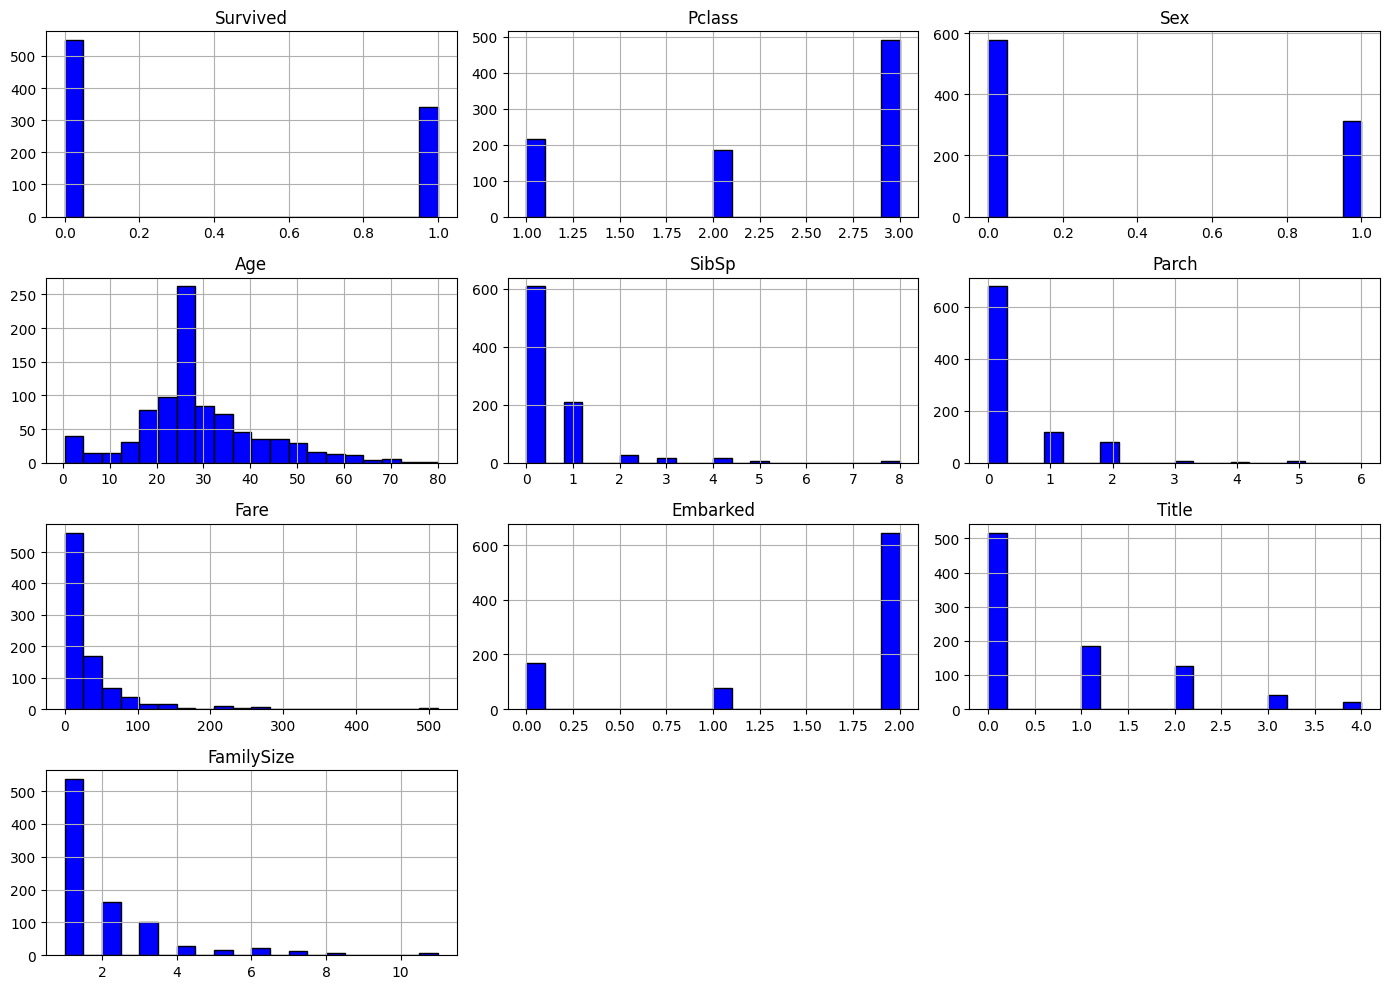

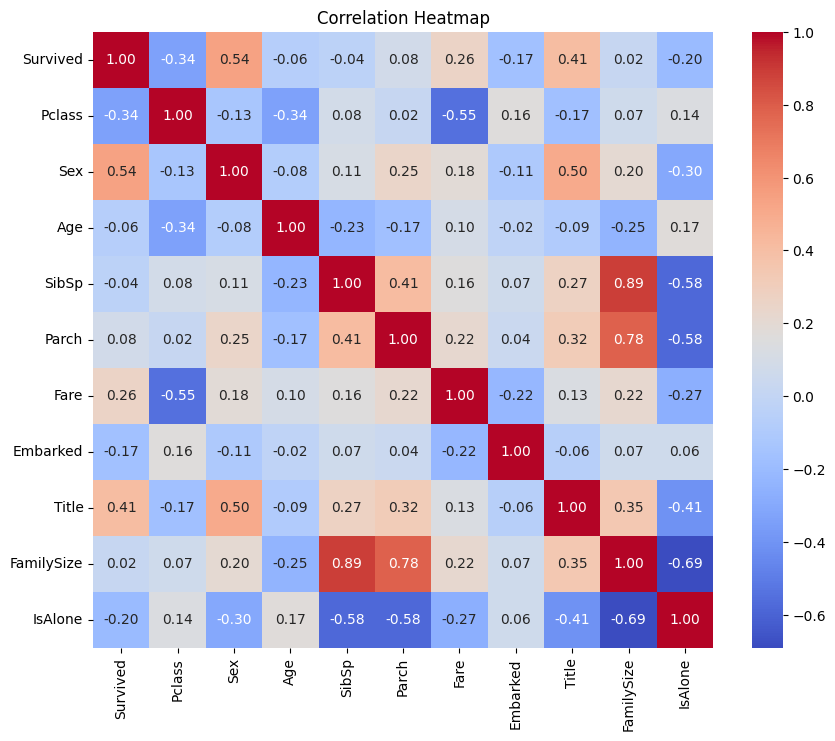

In [71]:
# Visualization of feature distributions
def plot_feature_distributions(df):
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    df[numeric_features].hist(bins=20, figsize=(14, 10), color='blue', edgecolor='black')
    plt.tight_layout()
    plt.show()

plot_feature_distributions(titanic_df)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [72]:
# Defineing features and target variable
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Building individual models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model,gb_model,lr_model


(RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42),
 LogisticRegression(max_iter=1000, random_state=42))

In [74]:
# Training individual models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train.fillna(0), y_train)
lr_model.fit(X_train.fillna(0), y_train)

rf_model,gb_model,lr_model

(RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42),
 LogisticRegression(max_iter=1000, random_state=42))

In [75]:
# Stacking
estimators = [
    ('rf', rf_model),
    ('gb', gb_model),
    ('lr', lr_model)
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(X_train.fillna(0), y_train)

# Make predictions and evaluate the ensemble model
y_pred = stacking_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8156424581005587
Confusion Matrix:
 [[91 14]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



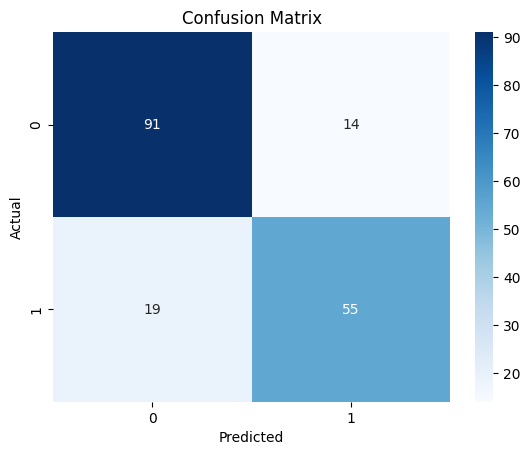

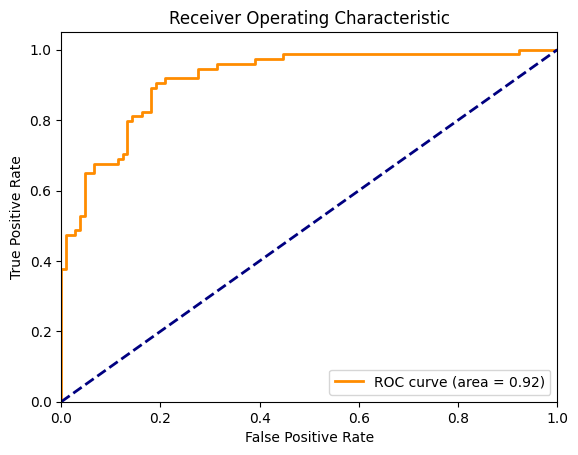

In [76]:
from sklearn.metrics import  roc_curve, auc
# Ploting confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Ploting ROC curve
fpr, tpr, _ = roc_curve(y_test, stacking_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [77]:
# Displaying predictions alongside actual values
predictions_df = X_test.copy()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_pred

print(predictions_df[['Actual', 'Predicted']])

     Actual  Predicted
709       1          0
439       0          0
840       0          0
720       1          1
39        1          1
..      ...        ...
433       0          0
773       0          0
25        1          0
84        1          1
10        1          1

[179 rows x 2 columns]
